# Import Libraries

In [2]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from get_regression_coefs import get_regression_coefs

# Set the style for the plot and figure size

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13, 10)
plt.rcParams['axes.titlesize'] = 15

# A

 Data Logistics


In [3]:
# 1.Load the dataset from the Excel file
df = pd.read_excel('pwt100.xlsx', sheet_name = 'Data')

# 2.Extracting only the necessary columns from the dataset
columns_to_keep = ["countrycode", "year", "rgdpna", "pop", "emp", "rnna"]
df = df.loc[:, columns_to_keep]

# 3.Calculate real GDP per capita
df['rgdpna_pc'] = df['rgdpna'] / df['pop']

# 4.Take the natural logarithm of the real GDP per capita
df['log(rgdpna_pc)'] = np.log(df["rgdpna_pc"])

# 5.Obtain the data for Argentina
arg_df = df.loc[df["countrycode"] == "ARG"].copy()
arg_df.drop('countrycode', axis=1, inplace=True)
arg_df.reset_index(drop=True, inplace=True)
y_arg = arg_df['log(rgdpna_pc)'].copy()

# 6.Obtain the data for France
fra_df = df.loc[df["countrycode"] == "FRA"].copy()
fra_df.drop('countrycode', axis=1, inplace=True)
fra_df.reset_index(drop=True, inplace=True)
y_fra = fra_df['log(rgdpna_pc)'].copy()

Data Manipulation - Argentina

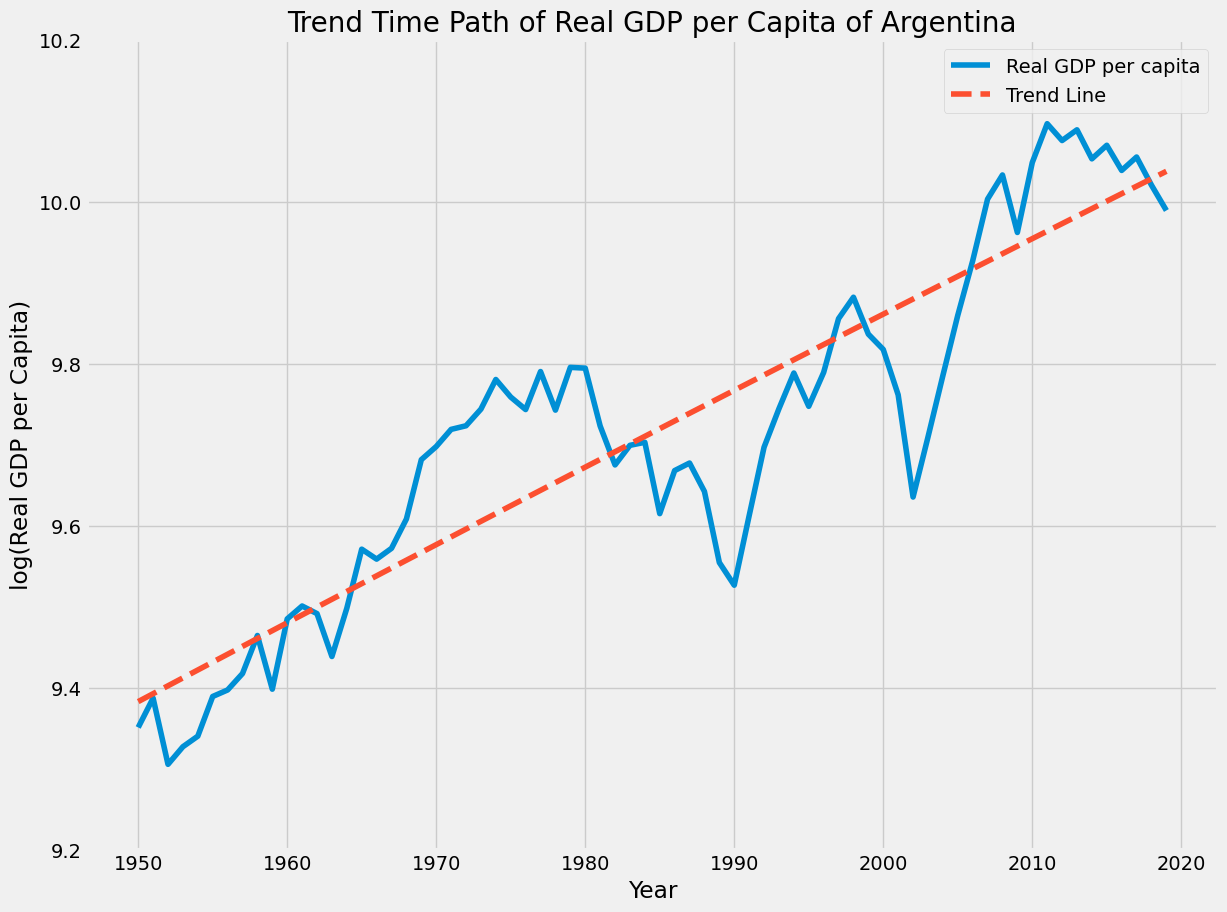

In [4]:
# Using log models for Argentina
T = len(arg_df)

# Create regressors x1, x2, and x3
x1 = np.empty(T)
x2 = np.empty(T)
x3 = np.empty(T)

for t in range(T):
    x1[t] = 1.0
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Get the regression coefficients using the get_regression_coefs function
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_arg, x1, x2, x3)

# Initialize the predicted values yhat
yhat_exp_quad_arg = np.empty(T)

# Compute the trend for all years
for t in range(T):
    yhat_exp_quad_arg[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plot the data and the exponential quadratic fit for Argentina
plt.plot(arg_df['year'], y_arg, label='Real GDP per capita')
plt.plot(arg_df['year'], yhat_exp_quad_arg, linestyle='dashed', label='Trend Line')
plt.ylim([9.2, 10.2])
plt.title('Trend Time Path of Real GDP per Capita of Argentina', size=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP per Capita)')
plt.legend()


Data Manipulation - France

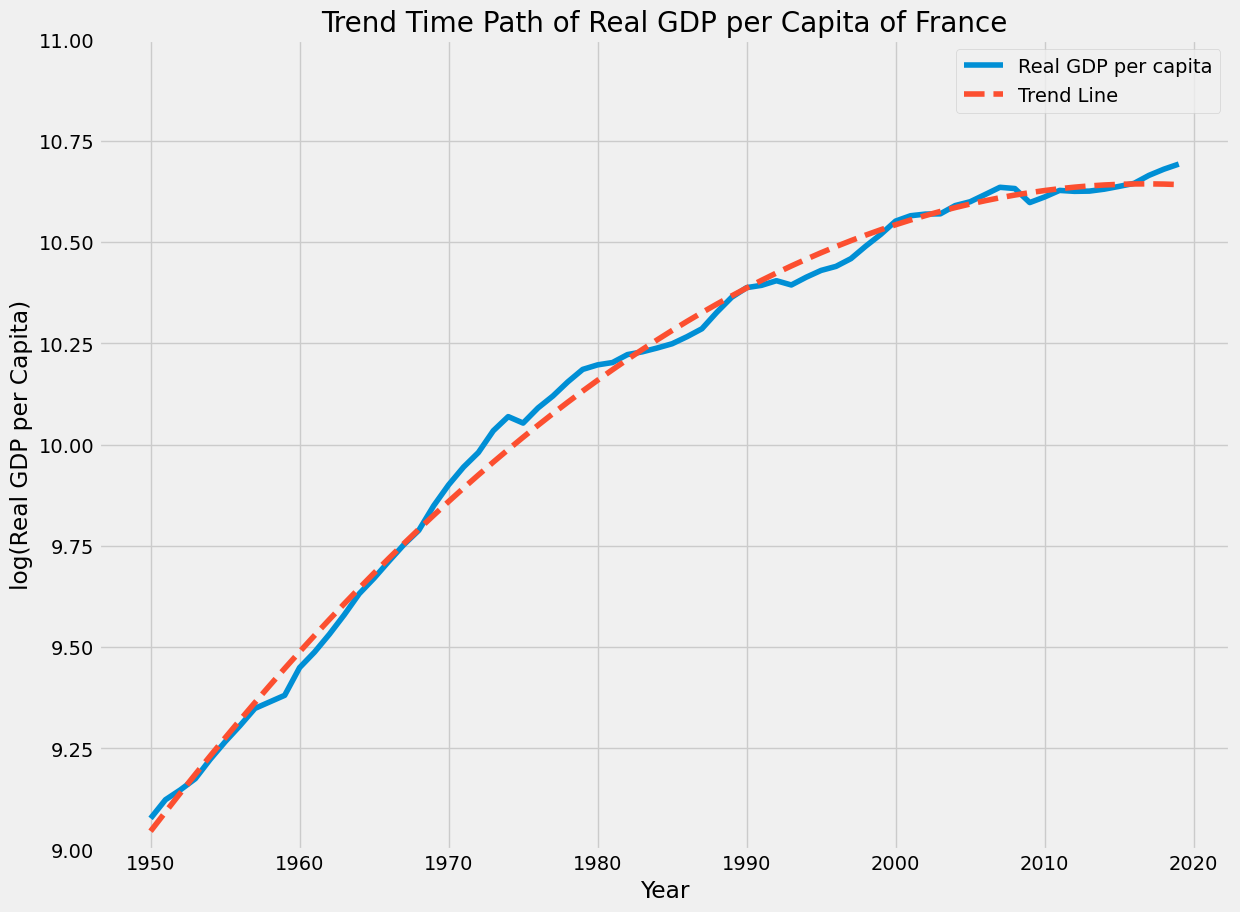

In [22]:
# Create regressors for the log model for France
T = len(fra_df)
x1, x2, x3 = np.empty(T), np.empty(T), np.empty(T)

for t in range(T):
    x1[t] = 1.
    x2[t] = t + 1
    x3[t] = (t + 1)**2

# Estimate coefficients for the log for France
a_exp_quad, b1_exp_quad, b2_exp_quad = get_regression_coefs(y_fra, x1, x2, x3)

# Initialise predicted values yhat
yhat_exp_quad_fra = np.empty(T)

# Create loop to compute trend for all years
for t in range(T):
    yhat_exp_quad_fra[t] = a_exp_quad + b1_exp_quad * (t + 1) + b2_exp_quad * (t + 1)**2
    
# Plotting the actual and predicted values for France
plt.plot(fra_df['year'], y_fra, label='Real GDP per capita')
plt.plot(fra_df['year'], yhat_exp_quad_fra, linestyle='dashed', label='Trend Line')
plt.ylim([9.0, 11.0])
plt.title('Trend Time Path of Real GDP per Capita of France', fontsize=20)
plt.xlabel('Year')
plt.ylabel('log(Real GDP per Capita)')
plt.legend()

# B

Production function: $Y=A \times L^\alpha \times K ^{1-\alpha} $

TFP is the weighted average of labour and capital input divided by output, we assume a weighting of 0.7 for labour and 0.4 for capital i.e. alpha = 0.7

Text(0, 0.5, 'Total Factor Productivity')

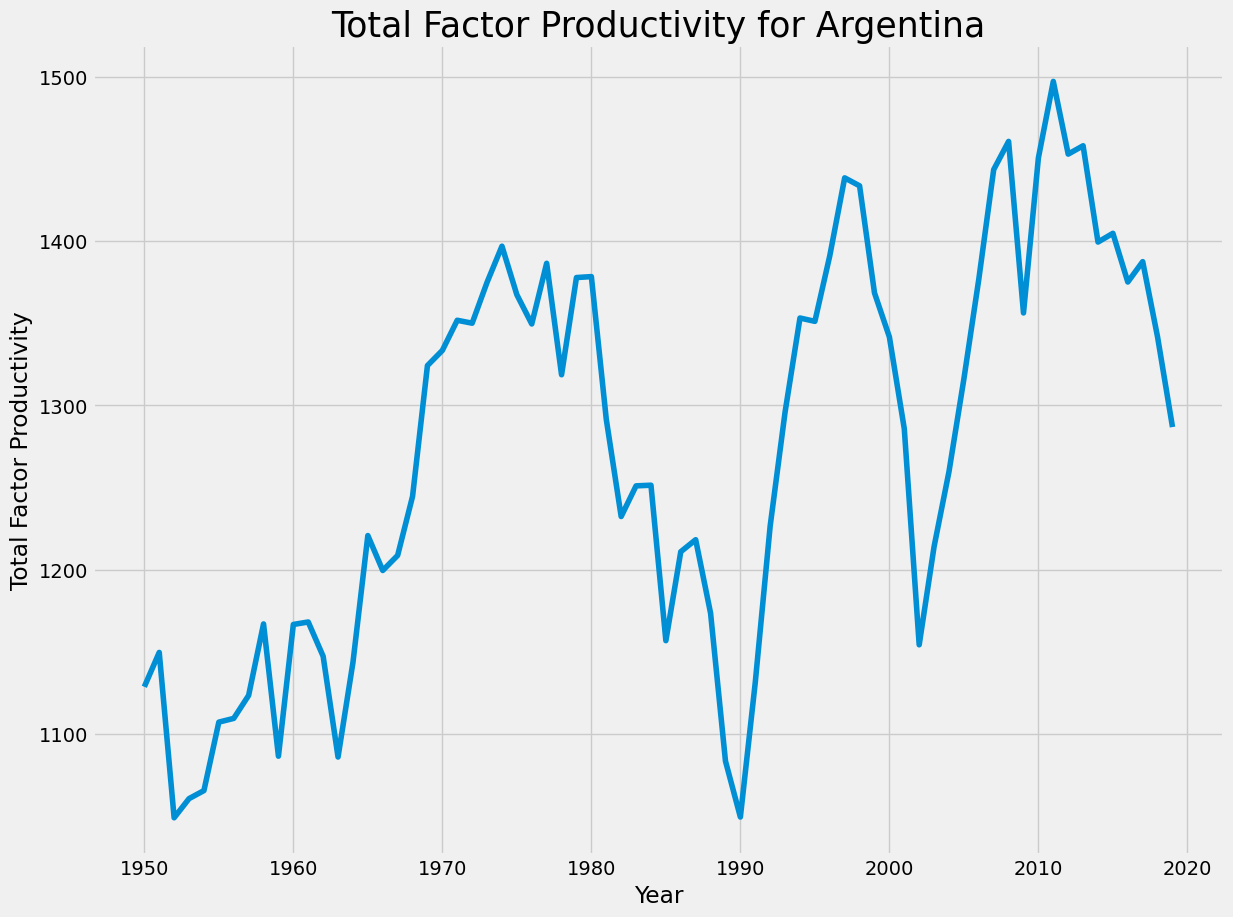

In [6]:
alpha = 0.7

# Plot TFP for Argentina
arg_df['TFP'] = arg_df['rgdpna'] / ((arg_df['emp'])**alpha * (arg_df['rnna']**(1 - alpha)))
plt.plot(arg_df['year'], arg_df['TFP'])
plt.title('Total Factor Productivity for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

Text(0, 0.5, 'Total Factor Productivity')

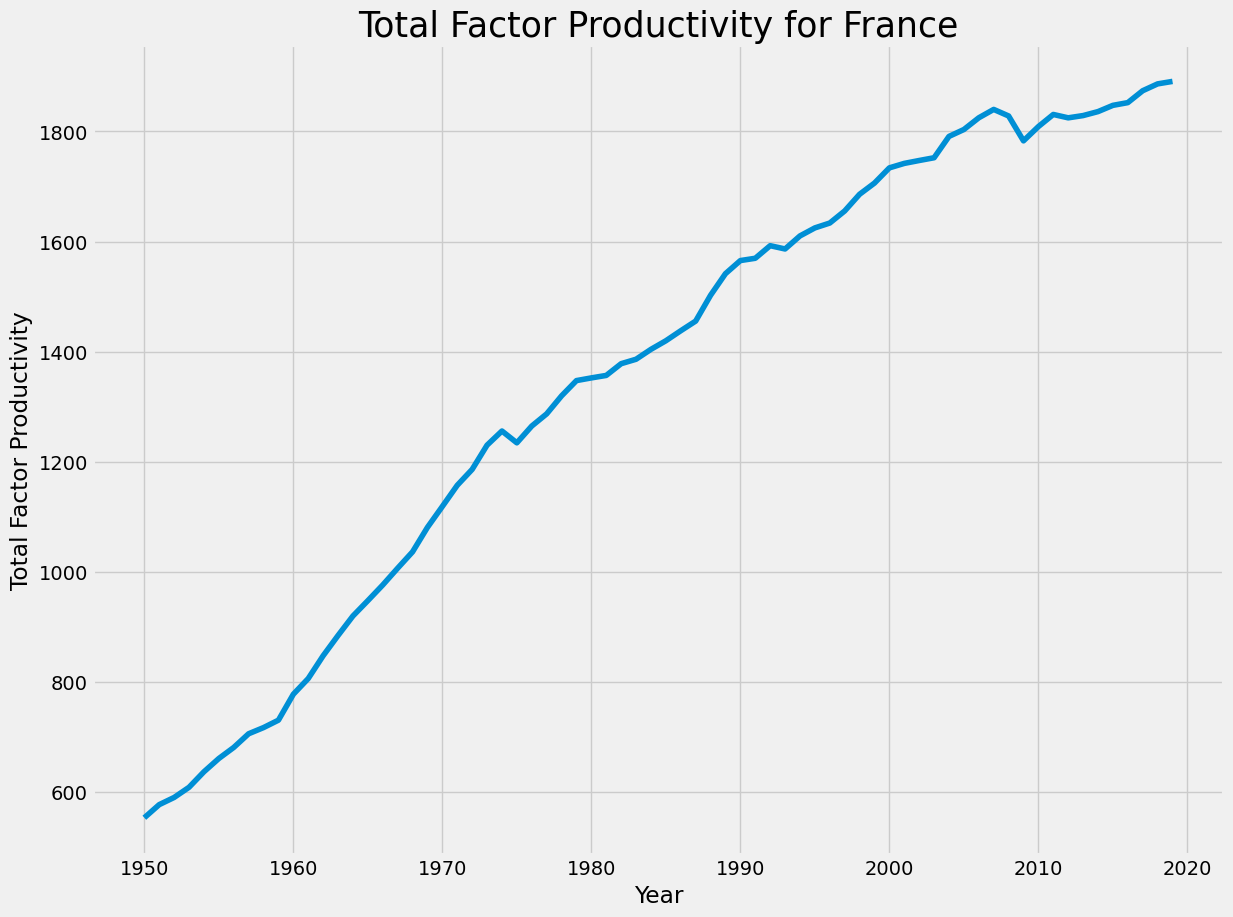

In [7]:
# Plot TFP for France
fra_df['TFP'] = fra_df['rgdpna'] / ((fra_df['emp'])**alpha * (fra_df['rnna']**(1 - alpha)))
plt.plot(fra_df['year'], fra_df['TFP'])
plt.title('Total Factor Productivity for France', size = 25)
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

# C

In [8]:
# Calculate the growth contribution
T = arg_df.shape[0]
arg_dlog_y = np.empty(T-1)
arg_dlog_A = np.empty(T-1)
arg_dlog_k = np.empty(T-1)
arg_dlog_l = np.empty(T-1)
for t in range(T-1):
    arg_dlog_y[t] = np.log(arg_df['rgdpna'][t+1]) - np.log(arg_df['rgdpna'][t])
    arg_dlog_A[t] = np.log(arg_df['TFP'][t+1]) - np.log(arg_df['TFP'][t])
    arg_dlog_k[t] = np.log(arg_df['rnna'][t+1]) - np.log(arg_df['rnna'][t])
    arg_dlog_l[t] = np.log(arg_df['emp'][t+1]) - np.log(arg_df['emp'][t])
arg_contr_TFP = arg_dlog_A / arg_dlog_y
arg_contr_k = ((1 - alpha) * arg_dlog_k) / arg_dlog_y
arg_contr_l = (alpha * arg_dlog_l) / arg_dlog_y

# Print table of growth contribution for Argentina
print('Argentina')
data = {'Growth Y' : arg_dlog_y, 'Growth TFP' : arg_dlog_A,
        'Growth K' : arg_dlog_k, 'Growth L' : arg_dlog_l,
        'TFP Component' : arg_contr_TFP,
        'K Component' : arg_contr_k,
        'L Component' : arg_contr_l}
arg_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
arg_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(arg_growth_df.iloc[:, 4:])

Argentina
             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.320034     0.488734     0.191232
1951-1952         1.491704    -0.313009    -0.178695
1952-1953         0.266993     0.467516     0.265492
1953-1954         0.144155     0.513370     0.342475
1954-1955         0.568046     0.269424     0.162530
1955-1956         0.078794     0.560865     0.360342
1956-1957         0.332283     0.418974     0.248743
1957-1958         0.593996     0.259339     0.146666
1958-1959         1.440110    -0.251154    -0.188957
1959-1960         0.690303     0.218759     0.090938
1960-1961         0.040384     0.683927     0.275689
1961-1962        -2.826643     2.442421     1.384222
1962-1963         1.468322    -0.232348    -0.235974
1963-1964         0.689954     0.192102     0.117944
1964-1965         0.742740     0.156943     0.100317
1965-1966        -7.449349     4.830581     3.618768
1966-1967         0.277249     0.412

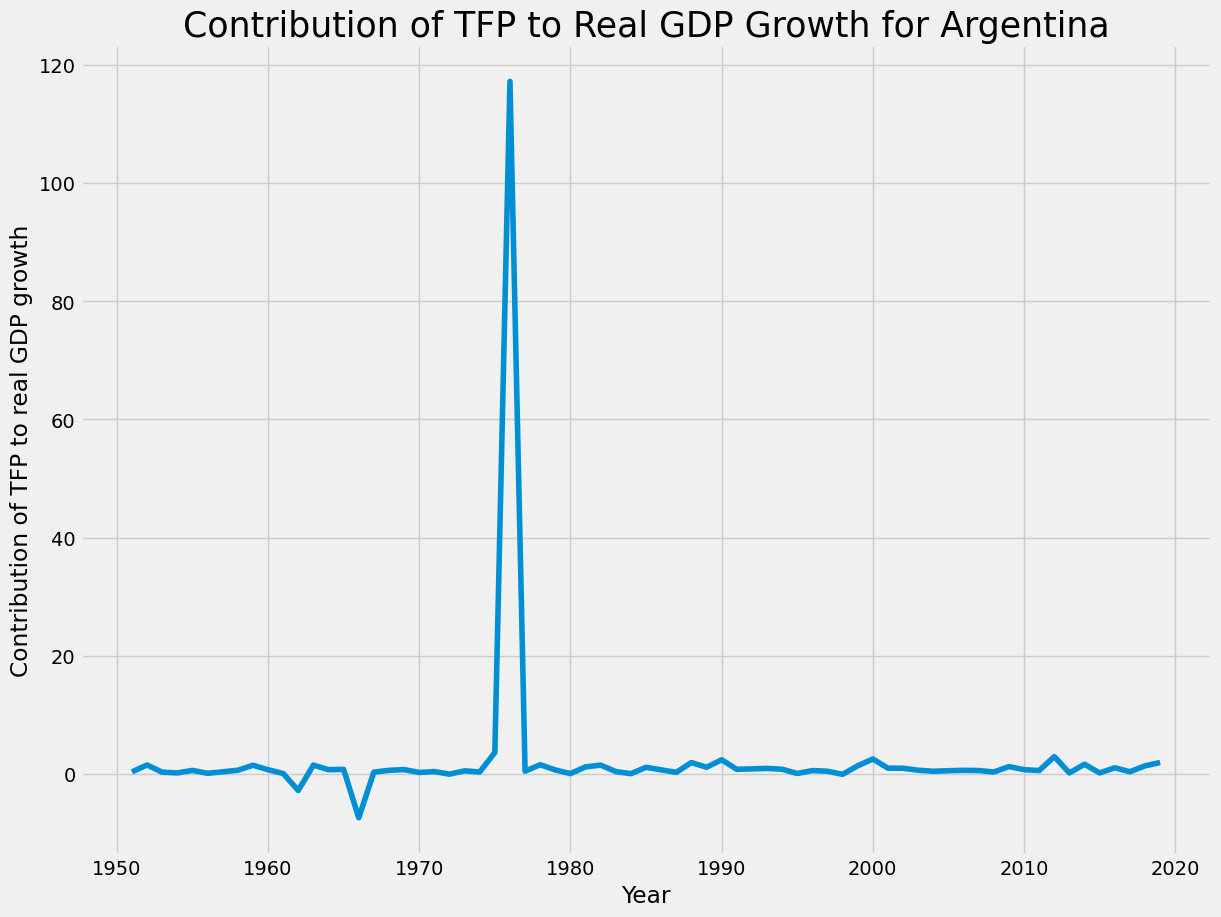

In [9]:
# Plot the contribution of TFP, capital, and labor for Argentina
plt.plot([1951 + i for i in range(T-1)], arg_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')
plt.show()

Text(0.5, 0, 'Year')

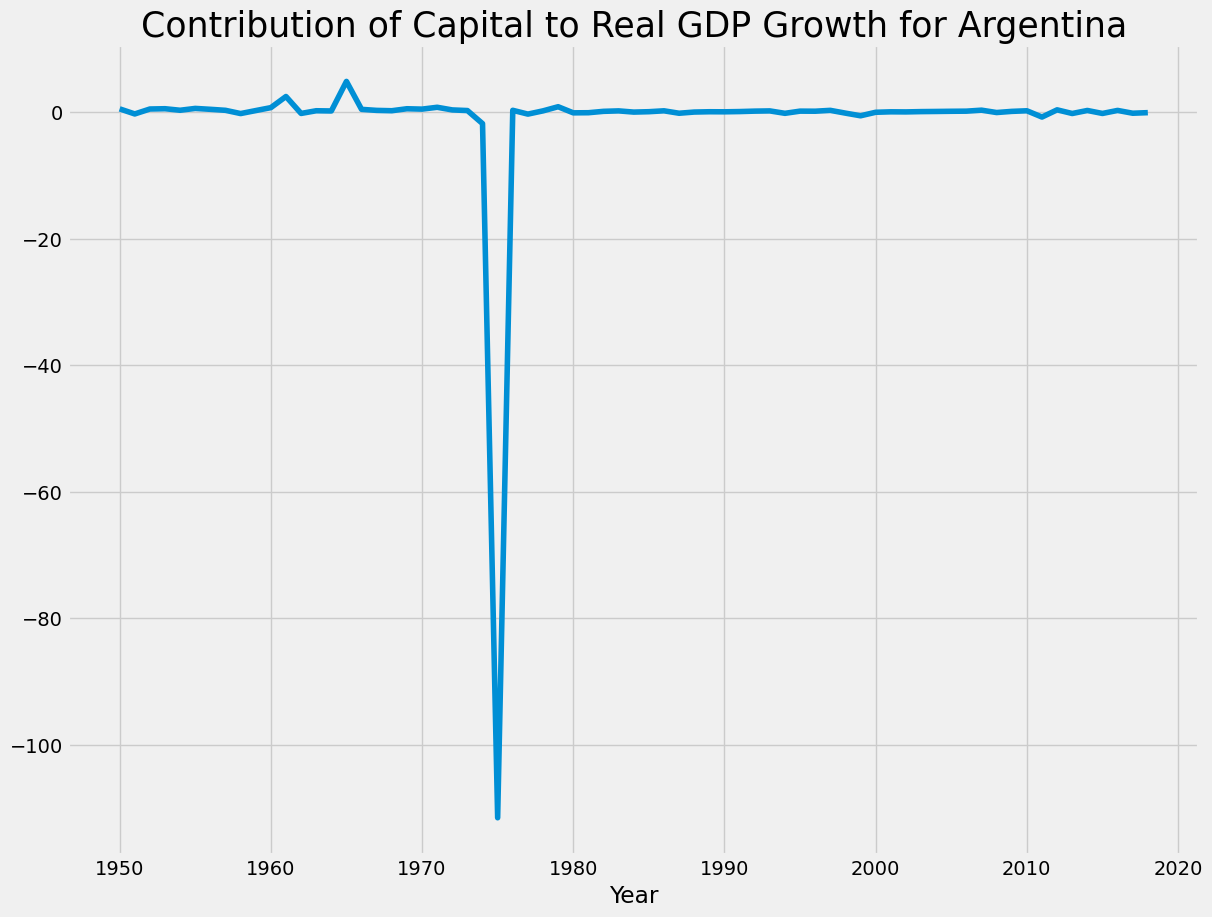

In [10]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for Argentina', size = 25)
plt.xlabel('Year')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

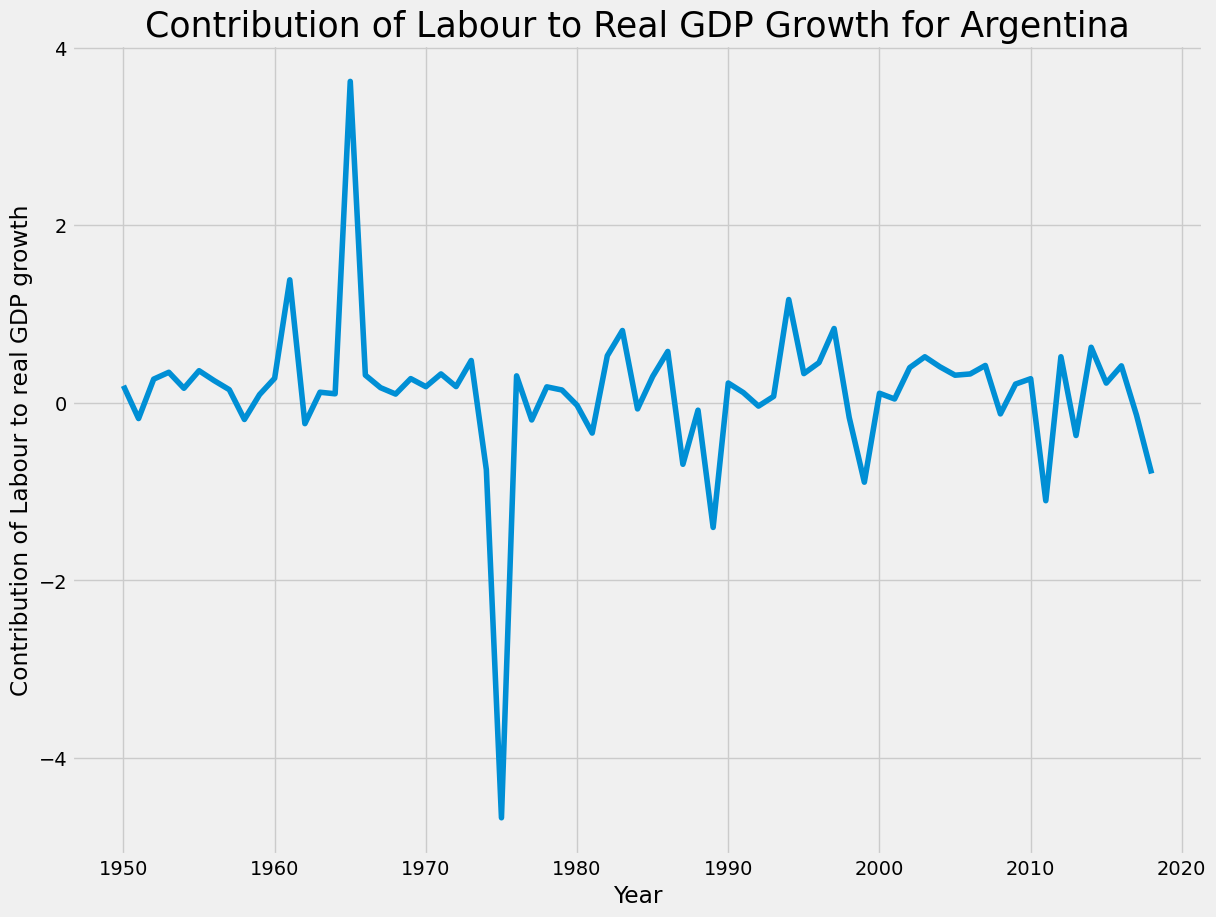

In [11]:
plt.plot([1950 + i for i in range(T-1)], arg_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

Text(0, 0.5, 'Percentage Change')

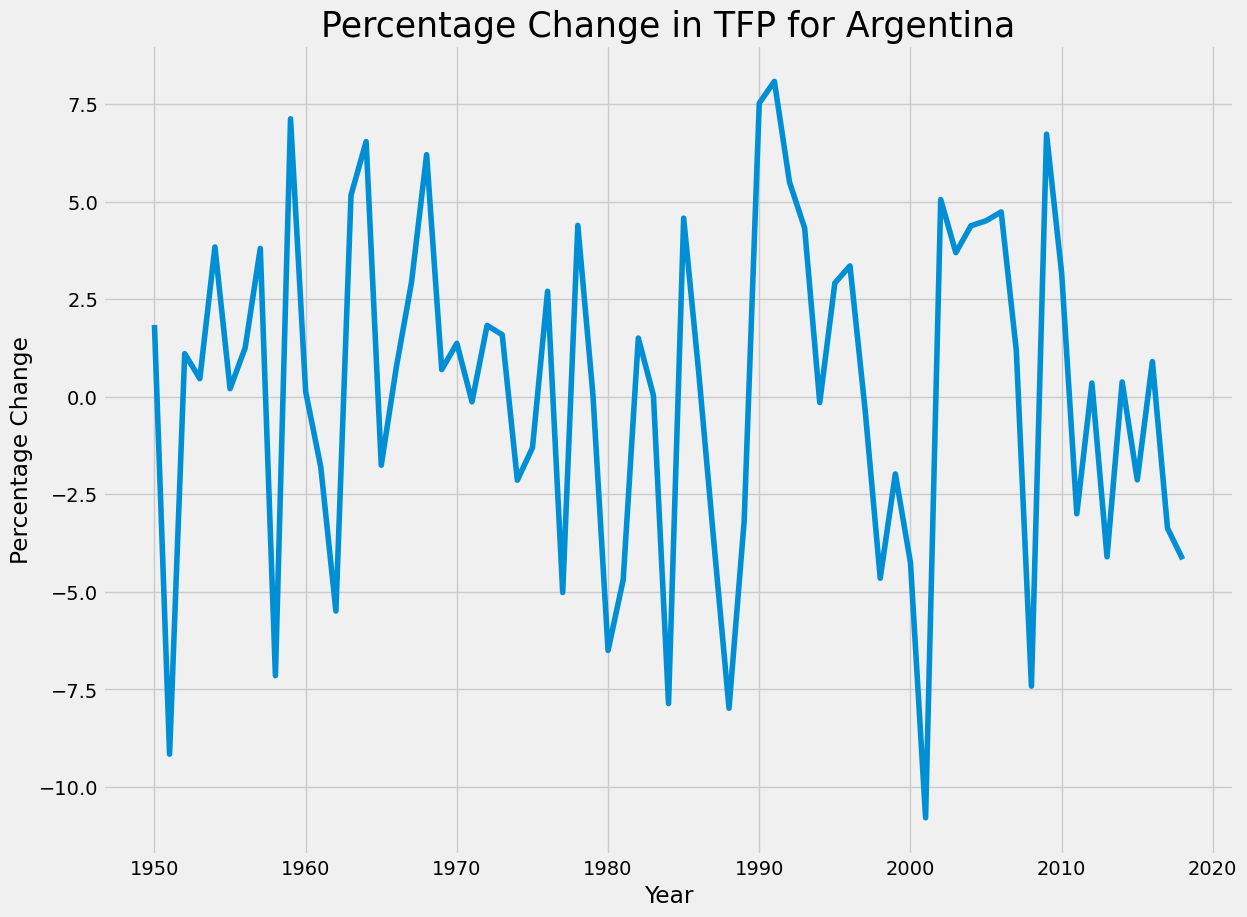

In [12]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_A*100)
plt.title('Percentage Change in TFP for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

In [13]:
T = fra_df.shape[0]
fra_dlog_y = np.empty(T-1)
fra_dlog_A = np.empty(T-1)
fra_dlog_k = np.empty(T-1)
fra_dlog_l = np.empty(T-1)
for t in range(T-1):
    fra_dlog_y[t] = np.log(fra_df['rgdpna'][t+1]) - np.log(fra_df['rgdpna'][t])
    fra_dlog_A[t] = np.log(fra_df['TFP'][t+1]) - np.log(fra_df['TFP'][t])
    fra_dlog_k[t] = np.log(fra_df['rnna'][t+1]) - np.log(fra_df['rnna'][t])
    fra_dlog_l[t] = np.log(fra_df['emp'][t+1]) - np.log(fra_df['emp'][t])
fra_contr_TFP = fra_dlog_A / fra_dlog_y
fra_contr_k = ((1 - alpha) * fra_dlog_k) / fra_dlog_y
fra_contr_l = (alpha * fra_dlog_l) / fra_dlog_y

# print table of growth contributions
print('France')
data = {'Growth Y' : fra_dlog_y, 'Growth TFP' : fra_dlog_A,
        'Growth K' : fra_dlog_k, 'Growth L' : fra_dlog_l,
        'TFP Component' : fra_contr_TFP,
        'K Component' : fra_contr_k,
        'L Component' : fra_contr_l}

fra_growth_df = pd.DataFrame(data = data, index = [str(1950 + x) + "-" + str(1951 + x) for x in range(T-1)])
fra_growth_df.index.name = "Time Period"
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(fra_growth_df.iloc[:, 4:])

France
             TFP Component  K Component  L Component
Time Period                                         
1950-1951         0.780455     0.131007     0.088537
1951-1952         0.701316     0.209704     0.088980
1952-1953         0.887858     0.187674    -0.075533
1953-1954         0.819050     0.155361     0.025589
1954-1955         0.709652     0.186274     0.104074
1955-1956         0.601033     0.222962     0.176005
1956-1957         0.669961     0.230414     0.099625
1957-1958         0.578824     0.483618    -0.062442
1958-1959         0.702178     0.440581    -0.142759
1959-1960         0.797989     0.186838     0.015173
1960-1961         0.723619     0.281957    -0.005576
1961-1962         0.777632     0.231083    -0.008715
1962-1963         0.677234     0.239857     0.082909
1963-1964         0.621216     0.261576     0.117209
1964-1965         0.627658     0.327129     0.045213
1965-1966         0.578789     0.316002     0.105209
1966-1967         0.632917     0.326982

Text(0, 0.5, 'Contribution of TFP to real GDP growth')

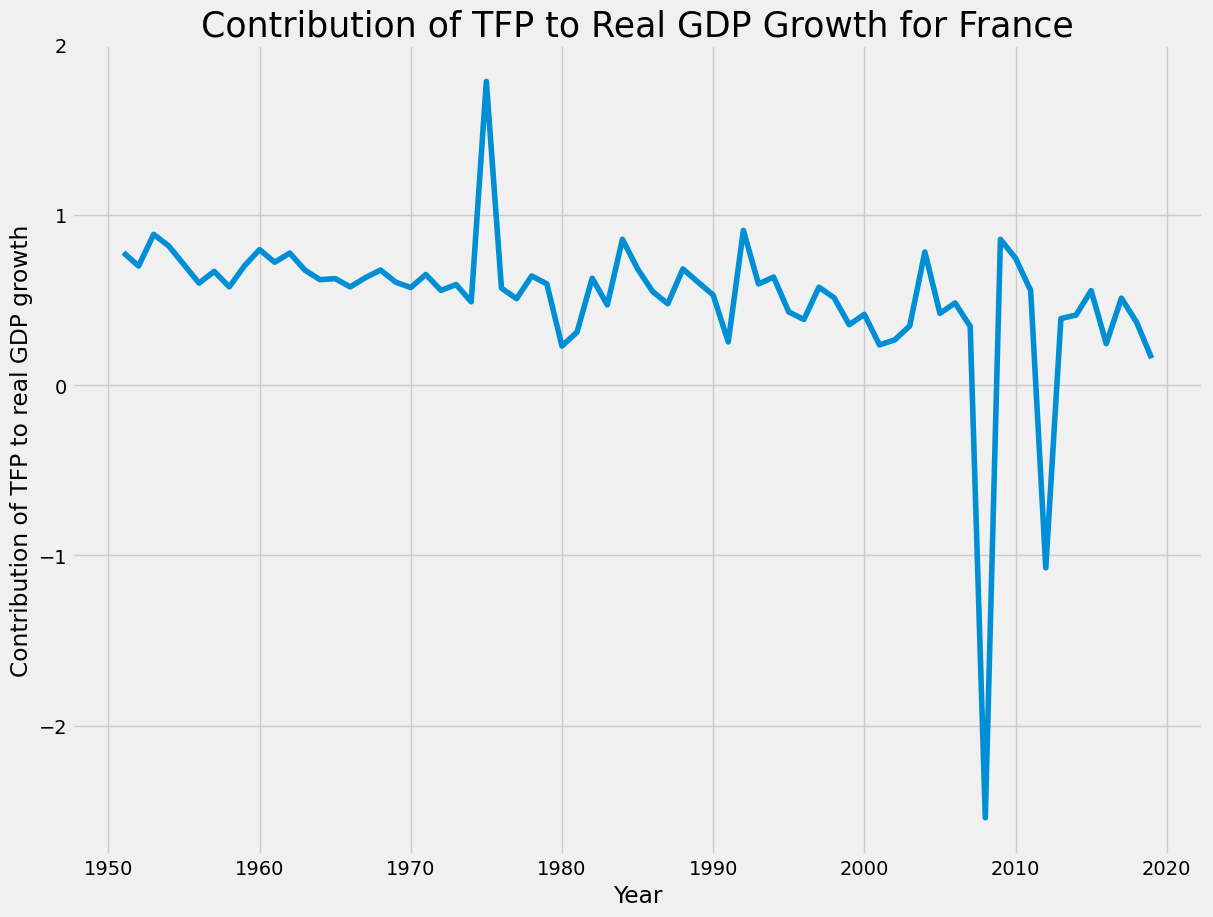

In [14]:
# plot contributions
plt.plot([1951 + i for i in range(T-1)], fra_contr_TFP)
plt.title('Contribution of TFP to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of TFP to real GDP growth')

Text(0, 0.5, 'Contribution of Capital to real GDP growth')

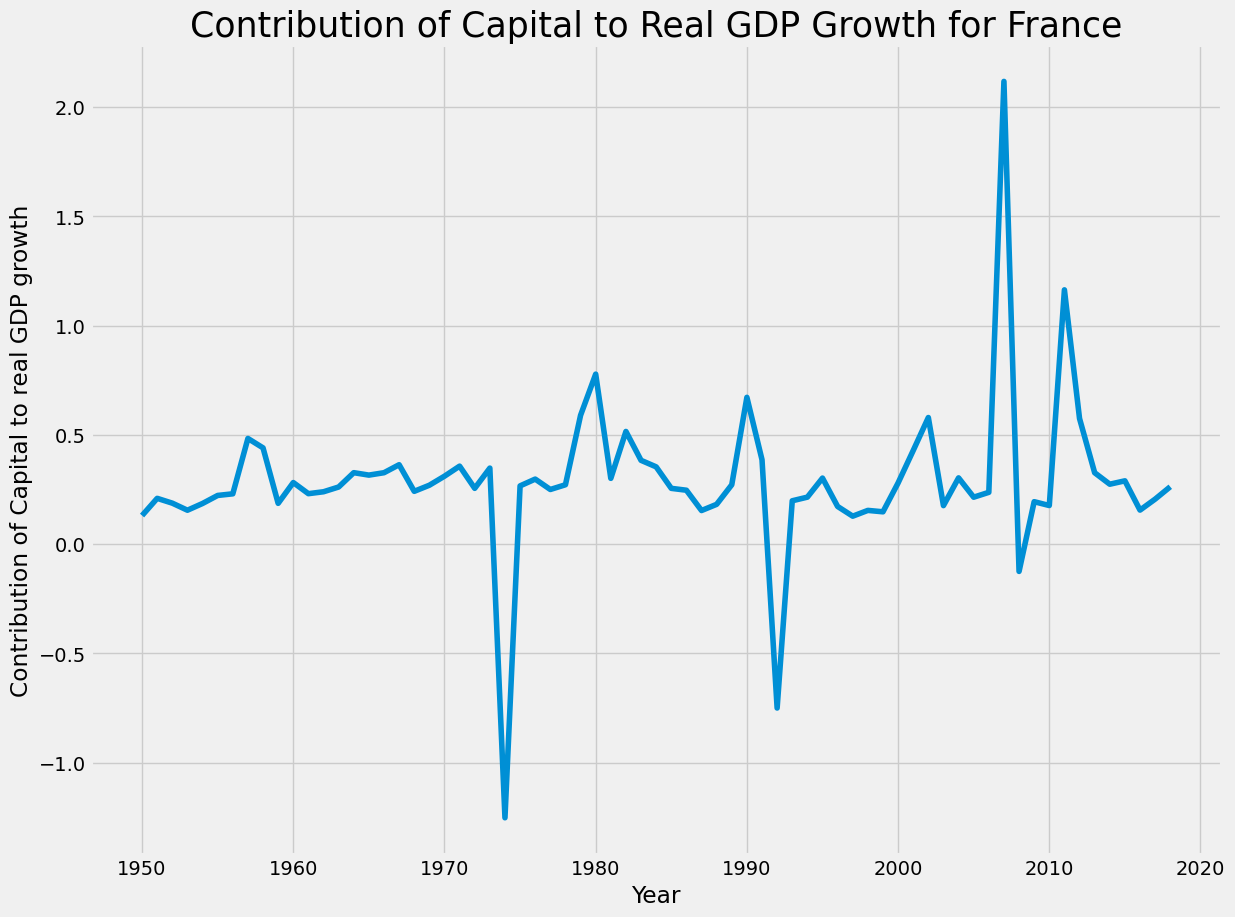

In [15]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_k)
plt.title('Contribution of Capital to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Capital to real GDP growth')

Text(0, 0.5, 'Contribution of Labour to real GDP growth')

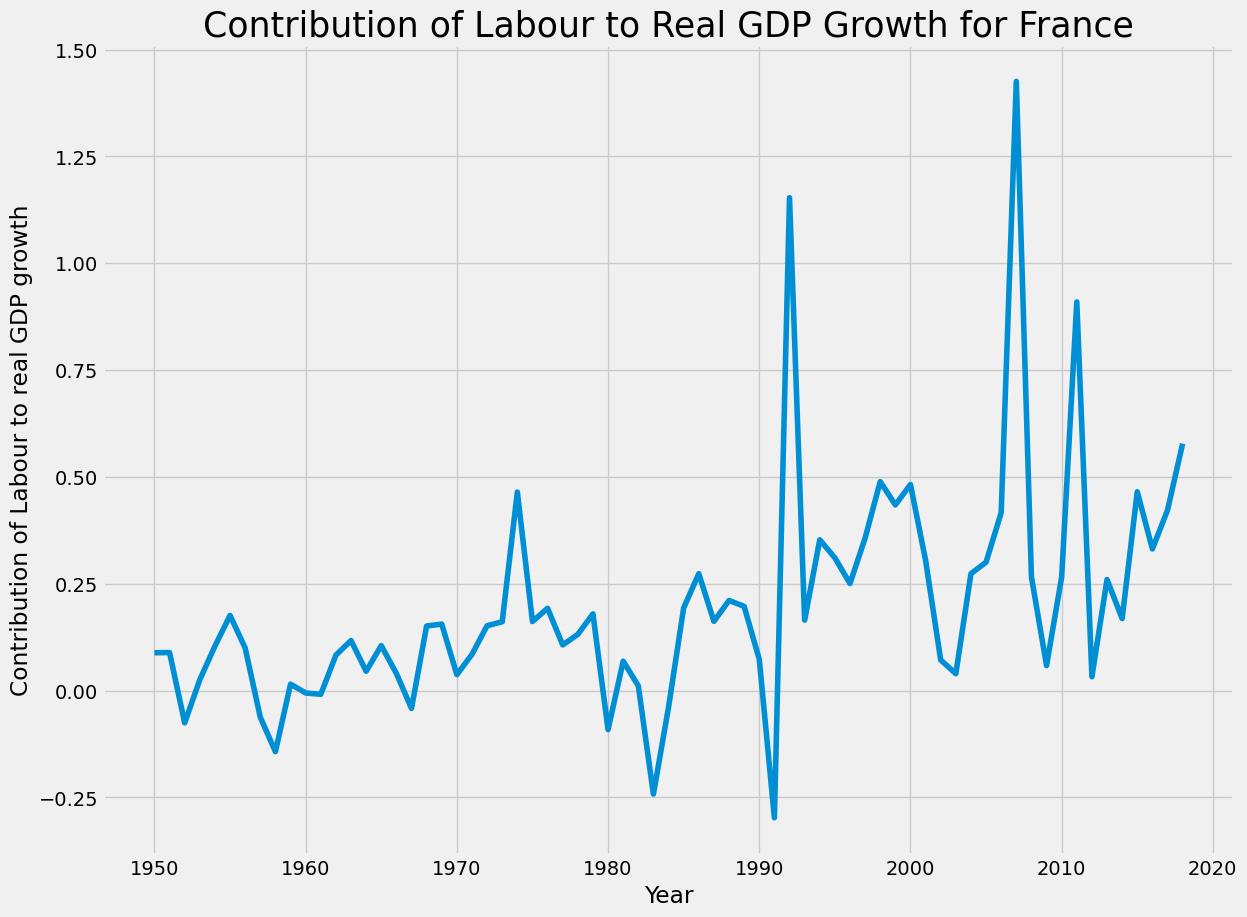

In [16]:
plt.plot([1950 + i for i in range(T-1)], fra_contr_l)
plt.title('Contribution of Labour to Real GDP Growth for France', size=25)
plt.xlabel('Year')
plt.ylabel('Contribution of Labour to real GDP growth')

Text(0, 0.5, 'Percentage Change')

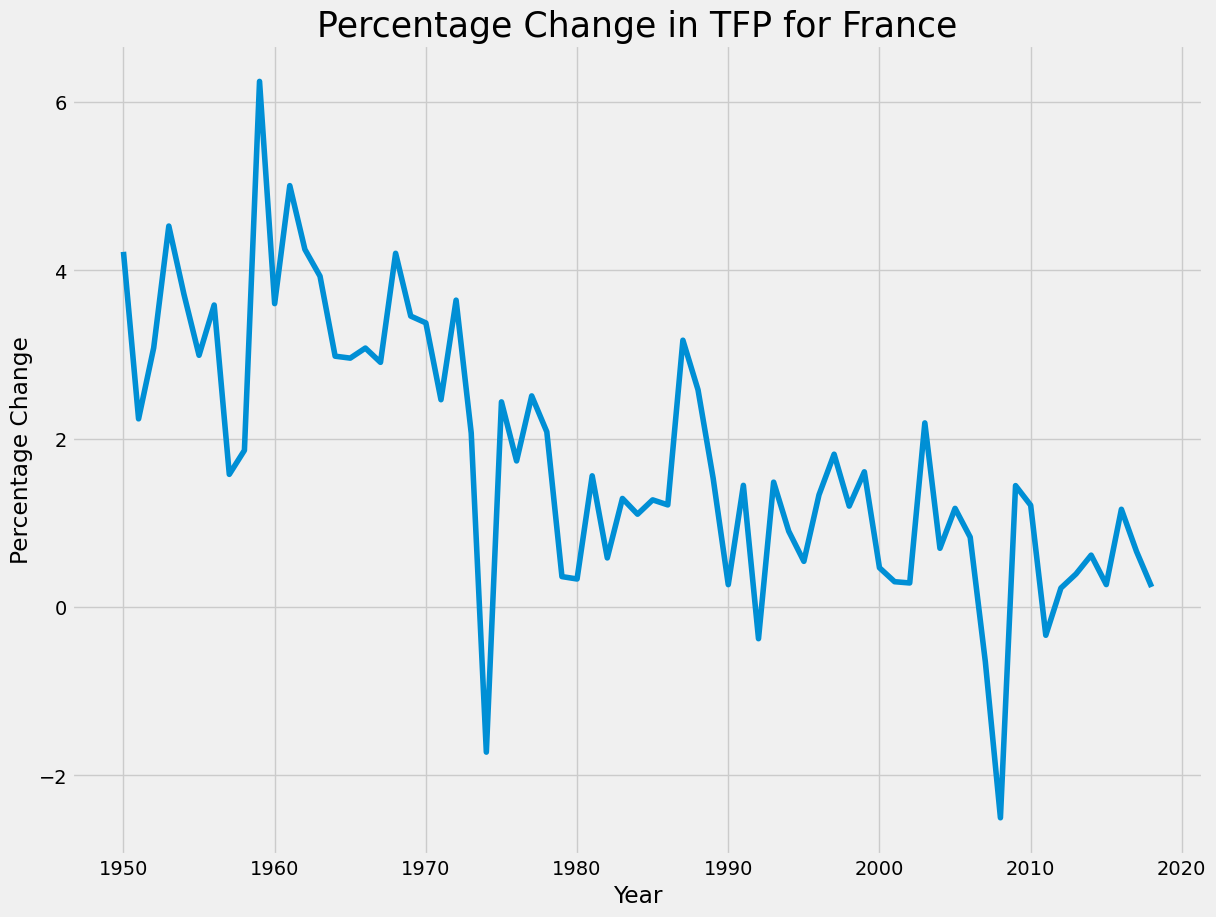

In [17]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_A*100)
plt.title('Percentage Change in TFP for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

0.02320869376552627


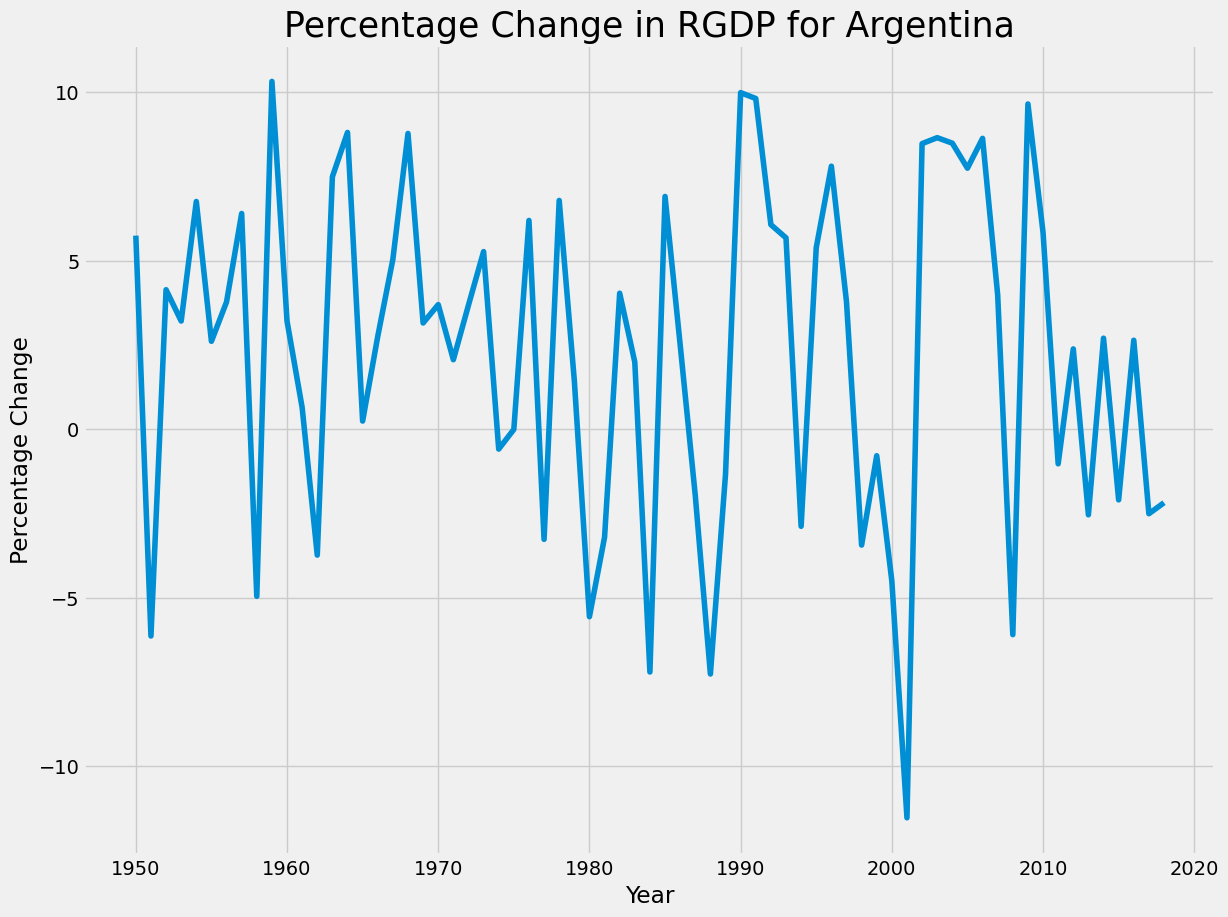

In [18]:
plt.plot([1950 + i for i in range(T-1)], arg_dlog_y*100)
plt.title('Percentage Change in RGDP for Argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(arg_dlog_y.mean(axis=None))

0.009249613831313808


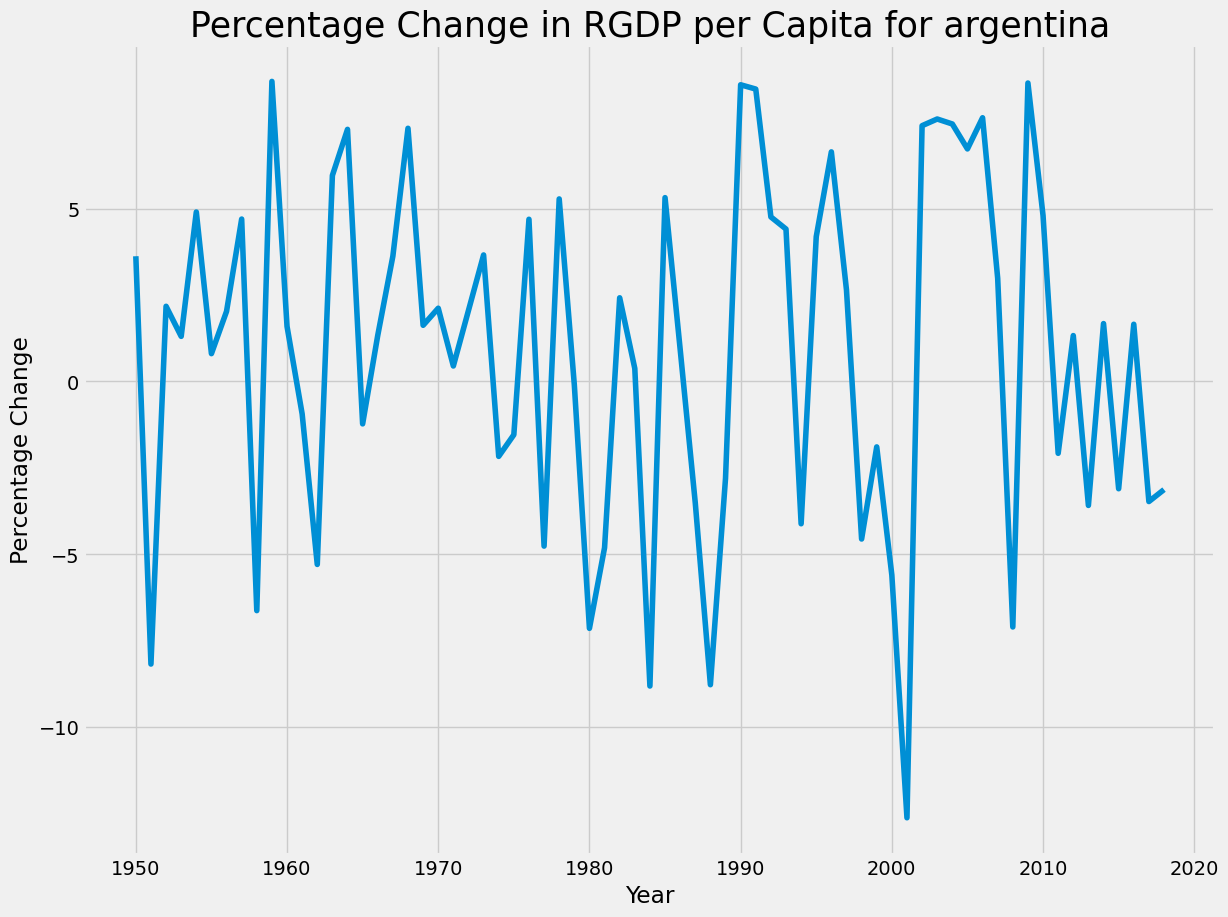

In [19]:
T = arg_df.shape[0]
arg_dlog_ypc = np.empty(T-1)

for t in range(T-1):
    arg_dlog_ypc[t] = y_arg[t+1] - y_arg[t]
    

plt.plot([1950 + i for i in range(T-1)], arg_dlog_ypc*100)
plt.title('Percentage Change in RGDP per Capita for argentina', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(arg_dlog_ypc.mean(axis=None))

0.03006898016579207


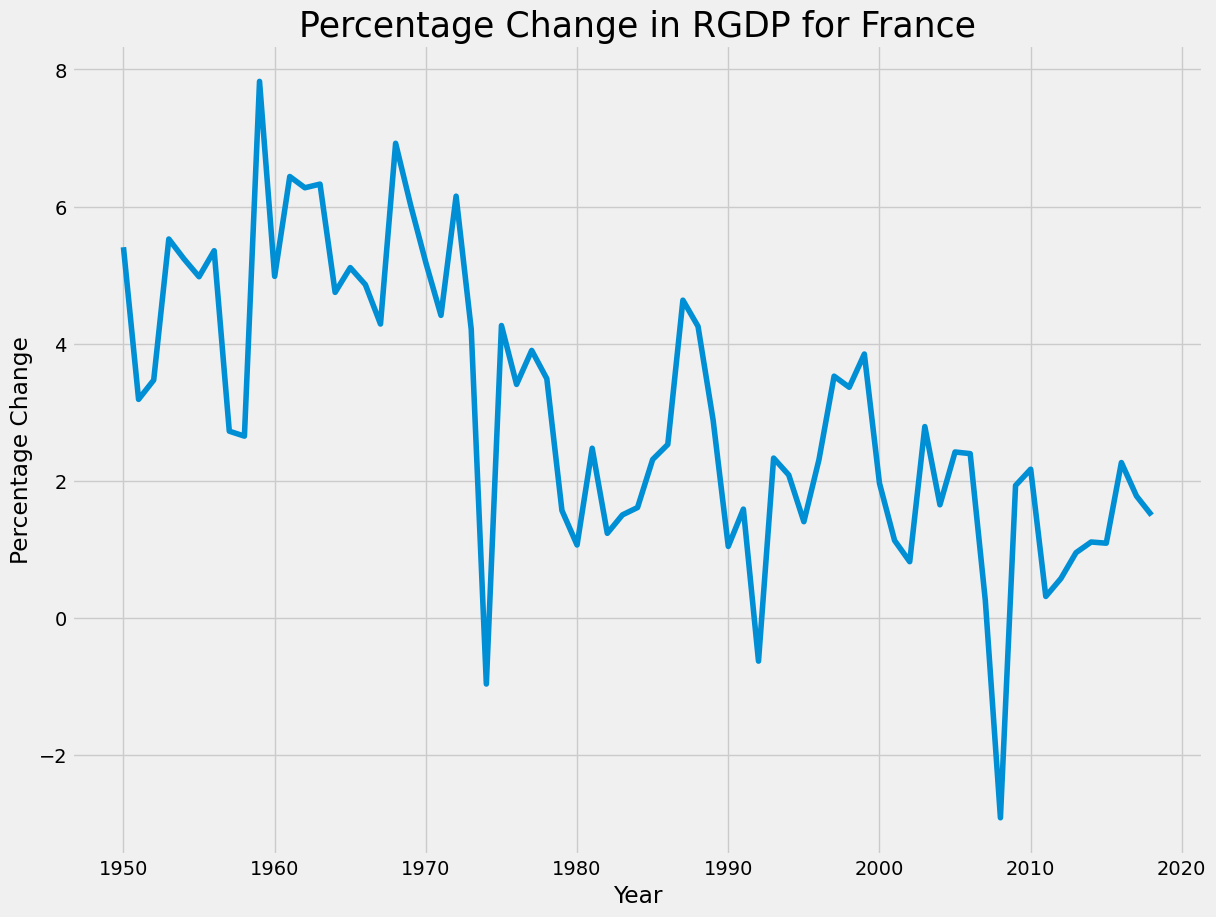

In [20]:
plt.plot([1950 + i for i in range(T-1)], fra_dlog_y*100)
plt.title('Percentage Change in RGDP for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(fra_dlog_y.mean(axis=None))

0.02341327586875243


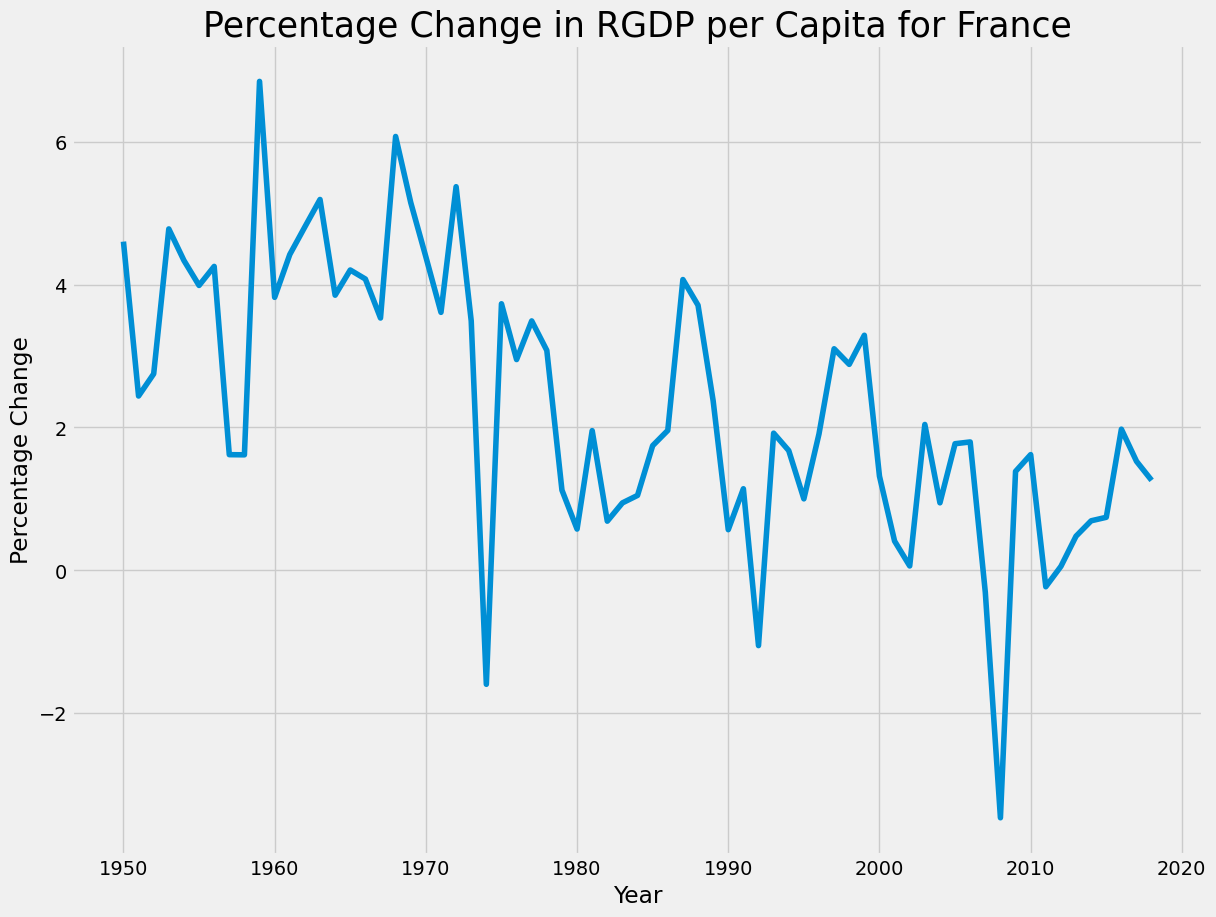

In [23]:
T = fra_df.shape[0]
fra_dlog_ypc = np.empty(T-1)

for t in range(T-1):
    fra_dlog_ypc[t] = y_fra[t+1] - y_fra[t]
    
plt.plot([1950 + i for i in range(T-1)], fra_dlog_ypc*100)
plt.title('Percentage Change in RGDP per Capita for France', size=25)
plt.xlabel('Year')
plt.ylabel('Percentage Change')

print(fra_dlog_ypc.mean(axis=None))

In [32]:
fray5080 = fra_dlog_ypc[1:32]
print(fray5080.mean(axis=None))

0.035454559563288086


In [33]:
fray8019 = fra_dlog_ypc[31:72]
print(fray8019.mean(axis=None))

0.012893977078677612


In [35]:
fraA5080 = fra_dlog_A[1:32]
print(fraA5080.mean(axis=None))

0.028075336968832774


In [36]:
fraA8019 = fra_dlog_A[31:72]
print(fraA8019.mean(axis=None))

0.00873420983895865


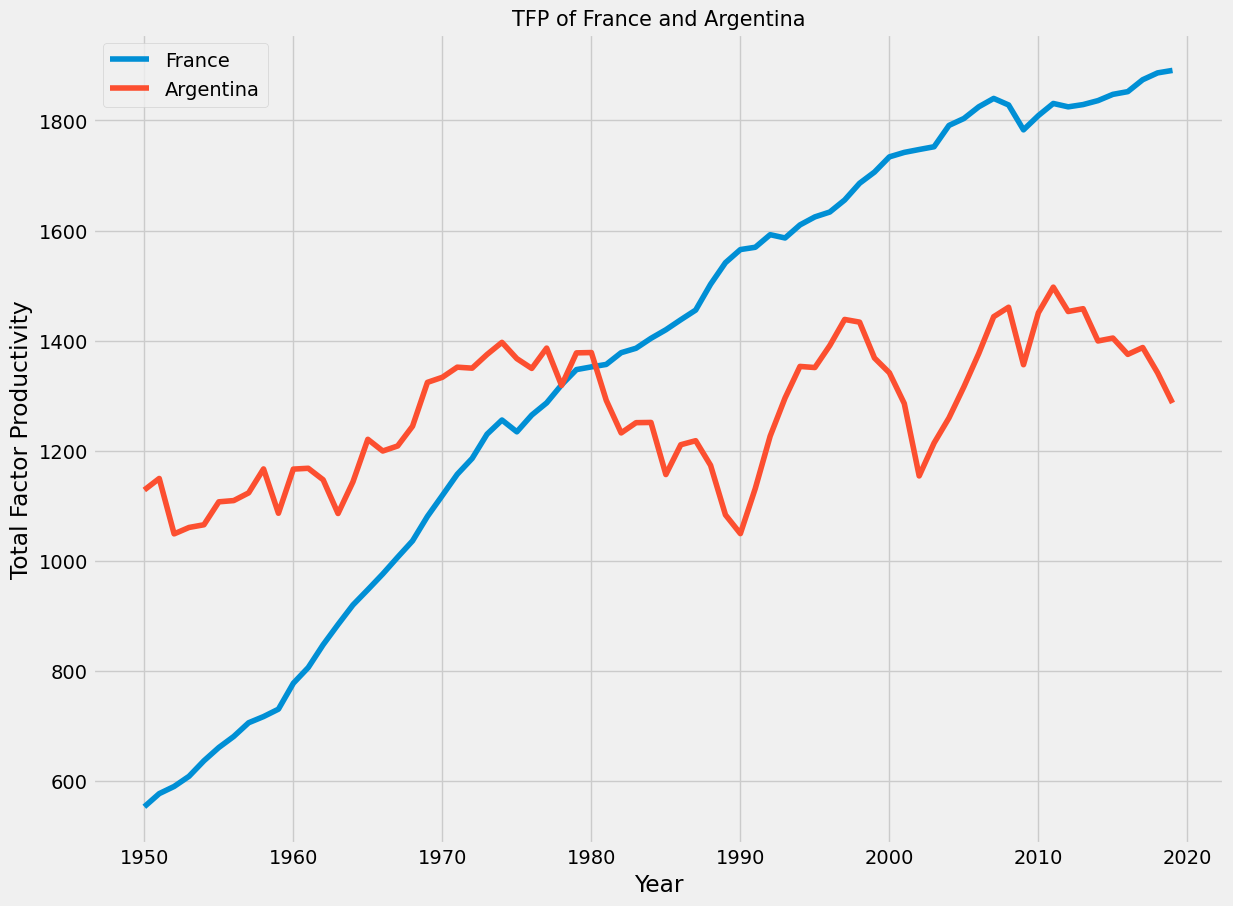

In [40]:
plt.plot(fra_df['year'], fra_df['TFP'],label='France')
plt.plot(arg_df['year'], arg_df['TFP'],label='Argentina')
plt.title('TFP of France and Argentina')
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

plt.legend()
plt.show()

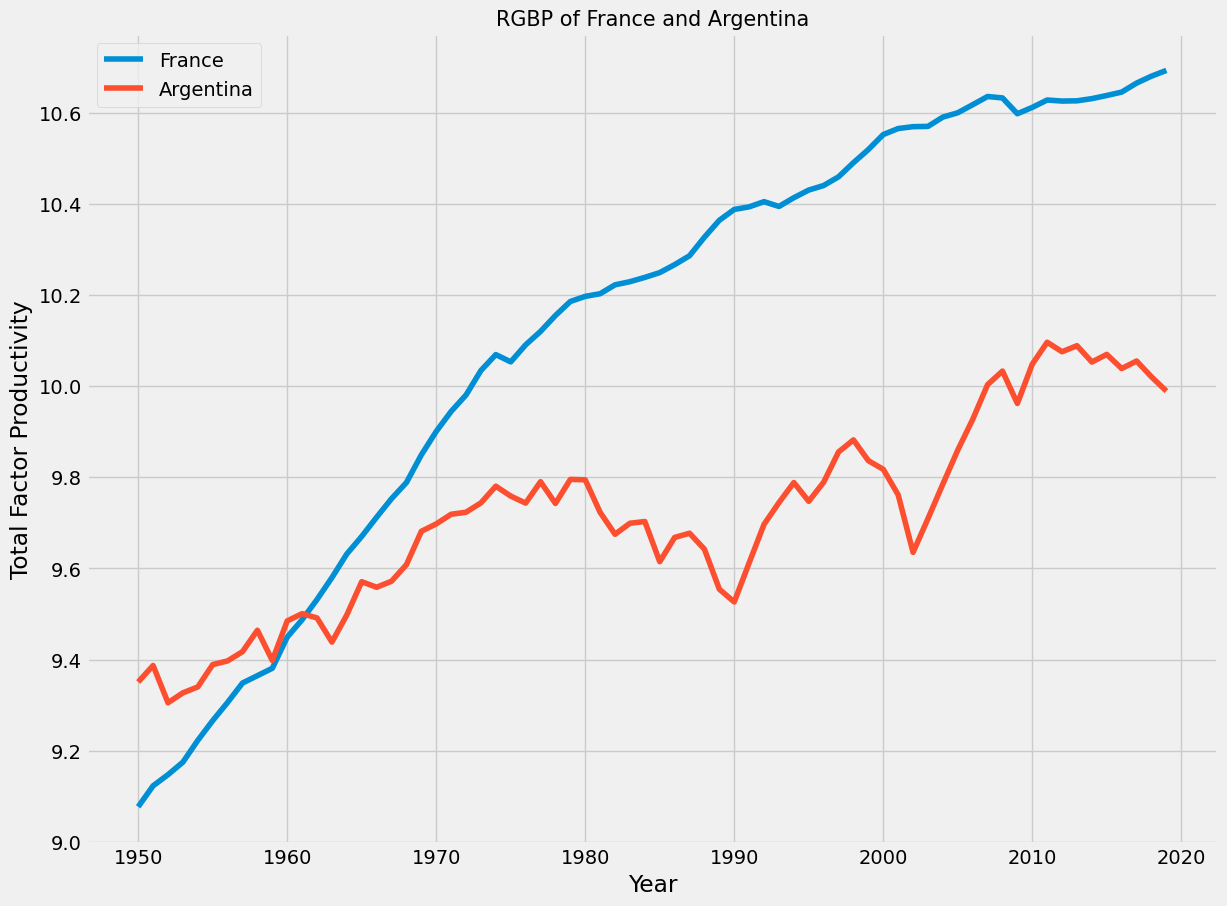

In [39]:
plt.plot(fra_df['year'], y_fra, label = 'France')
plt.plot(arg_df['year'], y_arg, label = 'Argentina')
plt.title('RGBP of France and Argentina')
plt.xlabel('Year')
plt.ylabel('Total Factor Productivity')

plt.legend()
plt.show()